# Description

Runs spectral clustering on the pca version of the data.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

3

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=3
env: OPEN_BLAS_NUM_THREADS=3
env: NUMEXPR_NUM_THREADS=3
env: OMP_NUM_THREADS=3


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
INITIAL_RANDOM_STATE = 40000

## Input data

In [6]:
INPUT_SUBSET = "pca"

In [7]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [8]:
DR_OPTIONS = {
    "n_components": 50,
    "svd_solver": "full",
    "random_state": 0,
}

In [9]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/data_transformations/pca/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full.pkl')

'pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full'

## Clustering

In [10]:
from sklearn.cluster import SpectralClustering

In [11]:
CLUSTERING_ATTRIBUTES_TO_SAVE = ["n_clusters"]

In [12]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_MIN"] = 2
CLUSTERING_OPTIONS["K_MAX"] = 60  # sqrt(3749)
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["KMEANS_N_INIT"] = 10
CLUSTERING_OPTIONS["N_NEIGHBORS"] = 10
CLUSTERING_OPTIONS["AFFINITY"] = "nearest_neighbors"

display(CLUSTERING_OPTIONS)

{'K_MIN': 2,
 'K_MAX': 60,
 'N_REPS_PER_K': 5,
 'KMEANS_N_INIT': 10,
 'N_NEIGHBORS': 10,
 'AFFINITY': 'nearest_neighbors'}

In [13]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in range(CLUSTERING_OPTIONS["K_MIN"], CLUSTERING_OPTIONS["K_MAX"] + 1):
    for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
        clus = SpectralClustering(
            n_clusters=k,
            n_init=CLUSTERING_OPTIONS["KMEANS_N_INIT"],
            affinity=CLUSTERING_OPTIONS["AFFINITY"],
            n_neighbors=CLUSTERING_OPTIONS["N_NEIGHBORS"],
            random_state=random_state,
        )

        method_name = type(clus).__name__
        CLUSTERERS[f"{method_name} #{idx}"] = clus

        random_state = random_state + 1
        idx = idx + 1

In [14]:
display(len(CLUSTERERS))

295

In [15]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('SpectralClustering #0',
 SpectralClustering(affinity='nearest_neighbors', n_clusters=2,
                    random_state=40000))

('SpectralClustering #1',
 SpectralClustering(affinity='nearest_neighbors', n_clusters=2,
                    random_state=40001))

In [16]:
clustering_method_name = method_name
display(clustering_method_name)

'SpectralClustering'

## Output directory

In [17]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["CLUSTERING_RUNS_DIR"],
    f"{INPUT_SUBSET}-{INPUT_STEM}",
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores')

# Load input file

In [18]:
data = pd.read_pickle(input_filepath)

In [19]:
data.shape

(3749, 50)

In [20]:
data.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
100001_raw-Food_weight,-0.547515,-0.007250,0.245361,0.132424,1.201447,-0.113158,0.048859,1.031679,0.711208,0.126100,...,0.113685,-0.109753,0.178202,-0.487868,1.805920,-0.342611,-0.663712,-1.313987,-1.481707,0.396410
100002_raw-Energy,-1.570593,-0.618992,-1.223395,1.627321,-0.563860,0.224922,-1.500327,2.045633,-1.665998,-0.180432,...,0.697880,1.412676,2.103988,0.385625,2.386495,-2.939998,-0.978275,-1.893307,-0.259497,0.423264
100003_raw-Protein,-0.601212,-0.948824,-1.022209,2.438433,-2.062235,0.356202,-1.538038,2.314675,-1.108991,0.318034,...,0.171992,1.351979,0.054404,-0.725132,2.226520,-3.481674,-0.445294,-0.477452,0.237157,1.440867
100004_raw-Fat,-1.648214,-0.342042,-0.270189,1.683268,-1.222401,0.018349,-0.032824,1.671161,-0.908965,0.224100,...,-0.358812,0.696836,1.072624,0.627951,1.802000,0.174704,0.826319,-0.826992,0.596113,0.620050
100005_raw-Carbohydrate,-1.867586,-0.006412,-0.303220,0.770958,-0.116822,0.460946,-2.407732,1.534273,-1.930577,0.064621,...,1.332852,1.978032,2.158456,0.831123,1.093202,-3.539033,-0.831862,-0.842298,-0.723072,0.359438


In [21]:
assert not data.isna().any().any()

# Clustering

## Generate ensemble

In [22]:
from clustering.ensemble import generate_ensemble

In [23]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=CLUSTERING_ATTRIBUTES_TO_SAVE,
)

  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 1/295 [00:04<24:18,  4.96s/it]

  1%|          | 2/295 [00:09<24:10,  4.95s/it]

  1%|          | 3/295 [00:14<24:05,  4.95s/it]

  1%|▏         | 4/295 [00:19<23:58,  4.94s/it]

  2%|▏         | 5/295 [00:24<23:52,  4.94s/it]

  2%|▏         | 6/295 [00:30<24:21,  5.06s/it]

  2%|▏         | 7/295 [00:35<24:35,  5.12s/it]

  3%|▎         | 8/295 [00:40<24:39,  5.15s/it]

  3%|▎         | 9/295 [00:45<24:49,  5.21s/it]

  3%|▎         | 10/295 [00:50<24:33,  5.17s/it]

  4%|▎         | 11/295 [00:56<24:43,  5.22s/it]

  4%|▍         | 12/295 [01:01<24:45,  5.25s/it]

  4%|▍         | 13/295 [01:06<24:28,  5.21s/it]

  5%|▍         | 14/295 [01:11<24:15,  5.18s/it]

  5%|▌         | 15/295 [01:16<23:58,  5.14s/it]

  5%|▌         | 16/295 [01:21<23:44,  5.11s/it]

  6%|▌         | 17/295 [01:26<23:38,  5.10s/it]

  6%|▌         | 18/295 [01:32<23:49,  5.16s/it]

  6%|▋         | 19/295 [01:37<23:42,  5.16s/it]

  7%|▋         | 20/295 [01:42<23:28,  5.12s/it]

  7%|▋         | 21/295 [01:47<23:34,  5.16s/it]

  7%|▋         | 22/295 [01:53<23:38,  5.20s/it]

  8%|▊         | 23/295 [01:58<23:34,  5.20s/it]

  8%|▊         | 24/295 [02:03<23:03,  5.11s/it]

  8%|▊         | 25/295 [02:08<23:11,  5.15s/it]

  9%|▉         | 26/295 [02:13<23:38,  5.27s/it]

  9%|▉         | 27/295 [02:18<23:12,  5.20s/it]

  9%|▉         | 28/295 [02:24<23:00,  5.17s/it]

 10%|▉         | 29/295 [02:29<23:20,  5.26s/it]

 10%|█         | 30/295 [02:34<23:10,  5.25s/it]

 11%|█         | 31/295 [02:40<23:25,  5.33s/it]

 11%|█         | 32/295 [02:46<24:03,  5.49s/it]

 11%|█         | 33/295 [02:51<23:46,  5.44s/it]

 12%|█▏        | 34/295 [02:57<24:12,  5.57s/it]

 12%|█▏        | 35/295 [03:03<24:27,  5.64s/it]

 12%|█▏        | 36/295 [03:09<24:42,  5.72s/it]

 13%|█▎        | 37/295 [03:14<24:45,  5.76s/it]

 13%|█▎        | 38/295 [03:20<24:20,  5.68s/it]

 13%|█▎        | 39/295 [03:26<24:14,  5.68s/it]

 14%|█▎        | 40/295 [03:31<23:40,  5.57s/it]

 14%|█▍        | 41/295 [03:36<23:07,  5.46s/it]

 14%|█▍        | 42/295 [03:41<22:41,  5.38s/it]

 15%|█▍        | 43/295 [03:47<22:36,  5.38s/it]

 15%|█▍        | 44/295 [03:52<22:20,  5.34s/it]

 15%|█▌        | 45/295 [03:58<22:56,  5.50s/it]

 16%|█▌        | 46/295 [04:03<22:35,  5.44s/it]

 16%|█▌        | 47/295 [04:08<22:08,  5.36s/it]

 16%|█▋        | 48/295 [04:13<21:47,  5.29s/it]

 17%|█▋        | 49/295 [04:19<21:32,  5.25s/it]

 17%|█▋        | 50/295 [04:24<21:39,  5.30s/it]

 17%|█▋        | 51/295 [04:30<21:59,  5.41s/it]

 18%|█▊        | 52/295 [04:35<22:22,  5.52s/it]

 18%|█▊        | 53/295 [04:41<21:52,  5.42s/it]

 18%|█▊        | 54/295 [04:46<21:43,  5.41s/it]

 19%|█▊        | 55/295 [04:51<21:19,  5.33s/it]

 19%|█▉        | 56/295 [04:56<21:05,  5.29s/it]

 19%|█▉        | 57/295 [05:02<21:06,  5.32s/it]

 20%|█▉        | 58/295 [05:07<20:46,  5.26s/it]

 20%|██        | 59/295 [05:12<20:52,  5.31s/it]

 20%|██        | 60/295 [05:17<20:38,  5.27s/it]

 21%|██        | 61/295 [05:23<21:03,  5.40s/it]

 21%|██        | 62/295 [05:28<20:33,  5.29s/it]

 21%|██▏       | 63/295 [05:34<20:30,  5.30s/it]

 22%|██▏       | 64/295 [05:39<20:41,  5.38s/it]

 22%|██▏       | 65/295 [05:44<20:13,  5.28s/it]

 22%|██▏       | 66/295 [05:49<19:55,  5.22s/it]

 23%|██▎       | 67/295 [05:54<19:52,  5.23s/it]

 23%|██▎       | 68/295 [06:00<19:50,  5.24s/it]

 23%|██▎       | 69/295 [06:05<19:57,  5.30s/it]

 24%|██▎       | 70/295 [06:10<19:31,  5.21s/it]

 24%|██▍       | 71/295 [06:15<19:19,  5.18s/it]

 24%|██▍       | 72/295 [06:20<19:13,  5.17s/it]

 25%|██▍       | 73/295 [06:25<18:57,  5.12s/it]

 25%|██▌       | 74/295 [06:31<19:14,  5.22s/it]

 25%|██▌       | 75/295 [06:36<18:54,  5.16s/it]

 26%|██▌       | 76/295 [06:41<19:16,  5.28s/it]

 26%|██▌       | 77/295 [06:47<19:16,  5.31s/it]

 26%|██▋       | 78/295 [06:52<19:04,  5.28s/it]

 27%|██▋       | 79/295 [06:57<18:46,  5.21s/it]

 27%|██▋       | 80/295 [07:02<18:40,  5.21s/it]

 27%|██▋       | 81/295 [07:08<18:42,  5.25s/it]

 28%|██▊       | 82/295 [07:13<18:34,  5.23s/it]

 28%|██▊       | 83/295 [07:18<18:42,  5.29s/it]

 28%|██▊       | 84/295 [07:24<18:33,  5.28s/it]

 29%|██▉       | 85/295 [07:29<18:49,  5.38s/it]

 29%|██▉       | 86/295 [07:35<18:52,  5.42s/it]

 29%|██▉       | 87/295 [07:40<18:52,  5.44s/it]

 30%|██▉       | 88/295 [07:45<18:23,  5.33s/it]

 30%|███       | 89/295 [07:50<18:10,  5.29s/it]

 31%|███       | 90/295 [07:56<18:09,  5.32s/it]

 31%|███       | 91/295 [08:01<18:07,  5.33s/it]

 31%|███       | 92/295 [08:06<17:59,  5.32s/it]

 32%|███▏      | 93/295 [08:12<17:43,  5.27s/it]

 32%|███▏      | 94/295 [08:17<17:45,  5.30s/it]

 32%|███▏      | 95/295 [08:22<17:23,  5.22s/it]

 33%|███▎      | 96/295 [08:27<17:09,  5.17s/it]

 33%|███▎      | 97/295 [08:33<17:27,  5.29s/it]

 33%|███▎      | 98/295 [08:38<17:33,  5.35s/it]

 34%|███▎      | 99/295 [08:44<17:32,  5.37s/it]

 34%|███▍      | 100/295 [08:49<17:30,  5.39s/it]

 34%|███▍      | 101/295 [08:54<17:26,  5.40s/it]

 35%|███▍      | 102/295 [09:00<17:35,  5.47s/it]

 35%|███▍      | 103/295 [09:05<17:22,  5.43s/it]

 35%|███▌      | 104/295 [09:10<16:59,  5.34s/it]

 36%|███▌      | 105/295 [09:16<16:44,  5.29s/it]

 36%|███▌      | 106/295 [09:21<16:31,  5.25s/it]

 36%|███▋      | 107/295 [09:26<16:28,  5.26s/it]

 37%|███▋      | 108/295 [09:31<16:17,  5.23s/it]

 37%|███▋      | 109/295 [09:37<16:26,  5.30s/it]

 37%|███▋      | 110/295 [09:42<16:13,  5.26s/it]

 38%|███▊      | 111/295 [09:47<16:07,  5.26s/it]

 38%|███▊      | 112/295 [09:53<16:20,  5.36s/it]

 38%|███▊      | 113/295 [09:58<16:16,  5.37s/it]

 39%|███▊      | 114/295 [10:03<16:05,  5.33s/it]

 39%|███▉      | 115/295 [10:09<15:55,  5.31s/it]

 39%|███▉      | 116/295 [10:14<16:13,  5.44s/it]

 40%|███▉      | 117/295 [10:20<16:18,  5.50s/it]

 40%|████      | 118/295 [10:26<16:29,  5.59s/it]

 40%|████      | 119/295 [10:31<16:05,  5.49s/it]

 41%|████      | 120/295 [10:37<16:22,  5.61s/it]

 41%|████      | 121/295 [10:42<16:07,  5.56s/it]

 41%|████▏     | 122/295 [10:48<15:57,  5.54s/it]

 42%|████▏     | 123/295 [10:54<15:59,  5.58s/it]

 42%|████▏     | 124/295 [10:59<15:54,  5.58s/it]

 42%|████▏     | 125/295 [11:05<15:43,  5.55s/it]

 43%|████▎     | 126/295 [11:10<15:40,  5.56s/it]

 43%|████▎     | 127/295 [11:16<15:25,  5.51s/it]

 43%|████▎     | 128/295 [11:21<15:37,  5.61s/it]

 44%|████▎     | 129/295 [11:27<15:19,  5.54s/it]

 44%|████▍     | 130/295 [11:32<15:04,  5.48s/it]

 44%|████▍     | 131/295 [11:38<14:59,  5.48s/it]

 45%|████▍     | 132/295 [11:43<15:02,  5.54s/it]

 45%|████▌     | 133/295 [11:49<15:08,  5.61s/it]

 45%|████▌     | 134/295 [11:55<15:05,  5.62s/it]

 46%|████▌     | 135/295 [12:00<14:56,  5.60s/it]

 46%|████▌     | 136/295 [12:06<14:56,  5.64s/it]

 46%|████▋     | 137/295 [12:12<15:04,  5.73s/it]

 47%|████▋     | 138/295 [12:18<15:04,  5.76s/it]

 47%|████▋     | 139/295 [12:24<15:12,  5.85s/it]

 47%|████▋     | 140/295 [12:30<15:01,  5.82s/it]

 48%|████▊     | 141/295 [12:36<15:06,  5.89s/it]

 48%|████▊     | 142/295 [12:42<15:12,  5.97s/it]

 48%|████▊     | 143/295 [12:48<15:17,  6.04s/it]

 49%|████▉     | 144/295 [12:54<15:21,  6.10s/it]

 49%|████▉     | 145/295 [13:00<15:15,  6.10s/it]

 49%|████▉     | 146/295 [13:07<15:12,  6.13s/it]

 50%|████▉     | 147/295 [13:13<15:09,  6.14s/it]

 50%|█████     | 148/295 [13:19<15:13,  6.21s/it]

 51%|█████     | 149/295 [13:26<15:20,  6.31s/it]

 51%|█████     | 150/295 [13:32<15:06,  6.25s/it]

 51%|█████     | 151/295 [13:38<15:08,  6.31s/it]

 52%|█████▏    | 152/295 [13:45<15:05,  6.33s/it]

 52%|█████▏    | 153/295 [13:51<15:06,  6.38s/it]

 52%|█████▏    | 154/295 [13:58<15:09,  6.45s/it]

 53%|█████▎    | 155/295 [14:04<15:01,  6.44s/it]

 53%|█████▎    | 156/295 [14:11<14:58,  6.46s/it]

 53%|█████▎    | 157/295 [14:17<14:51,  6.46s/it]

 54%|█████▎    | 158/295 [14:23<14:43,  6.45s/it]

 54%|█████▍    | 159/295 [14:30<14:49,  6.54s/it]

 54%|█████▍    | 160/295 [14:37<14:39,  6.52s/it]

 55%|█████▍    | 161/295 [14:43<14:23,  6.44s/it]

 55%|█████▍    | 162/295 [14:50<14:22,  6.48s/it]

 55%|█████▌    | 163/295 [14:56<14:10,  6.44s/it]

 56%|█████▌    | 164/295 [15:02<13:59,  6.41s/it]

 56%|█████▌    | 165/295 [15:09<13:48,  6.37s/it]

 56%|█████▋    | 166/295 [15:15<13:49,  6.43s/it]

 57%|█████▋    | 167/295 [15:21<13:40,  6.41s/it]

 57%|█████▋    | 168/295 [15:28<13:34,  6.41s/it]

 57%|█████▋    | 169/295 [15:34<13:27,  6.41s/it]

 58%|█████▊    | 170/295 [15:41<13:23,  6.43s/it]

 58%|█████▊    | 171/295 [15:47<13:27,  6.51s/it]

 58%|█████▊    | 172/295 [15:54<13:20,  6.51s/it]

 59%|█████▊    | 173/295 [16:01<13:21,  6.57s/it]

 59%|█████▉    | 174/295 [16:07<13:23,  6.64s/it]

 59%|█████▉    | 175/295 [16:14<13:05,  6.54s/it]

 60%|█████▉    | 176/295 [16:20<13:00,  6.56s/it]

 60%|██████    | 177/295 [16:27<12:54,  6.57s/it]

 60%|██████    | 178/295 [16:34<12:53,  6.61s/it]

 61%|██████    | 179/295 [16:40<12:53,  6.67s/it]

 61%|██████    | 180/295 [16:47<12:47,  6.68s/it]

 61%|██████▏   | 181/295 [16:54<12:39,  6.67s/it]

 62%|██████▏   | 182/295 [17:00<12:34,  6.68s/it]

 62%|██████▏   | 183/295 [17:07<12:31,  6.71s/it]

 62%|██████▏   | 184/295 [17:14<12:22,  6.69s/it]

 63%|██████▎   | 185/295 [17:21<12:19,  6.72s/it]

 63%|██████▎   | 186/295 [17:27<12:08,  6.69s/it]

 63%|██████▎   | 187/295 [17:34<12:01,  6.68s/it]

 64%|██████▎   | 188/295 [17:41<11:55,  6.68s/it]

 64%|██████▍   | 189/295 [17:48<11:57,  6.77s/it]

 64%|██████▍   | 190/295 [17:55<11:55,  6.81s/it]

 65%|██████▍   | 191/295 [18:01<11:49,  6.83s/it]

 65%|██████▌   | 192/295 [18:08<11:44,  6.84s/it]

 65%|██████▌   | 193/295 [18:15<11:36,  6.83s/it]

 66%|██████▌   | 194/295 [18:22<11:25,  6.78s/it]

 66%|██████▌   | 195/295 [18:29<11:19,  6.79s/it]

 66%|██████▋   | 196/295 [18:35<11:15,  6.82s/it]

 67%|██████▋   | 197/295 [18:42<11:09,  6.83s/it]

 67%|██████▋   | 198/295 [18:49<10:59,  6.80s/it]

 67%|██████▋   | 199/295 [18:56<10:53,  6.81s/it]

 68%|██████▊   | 200/295 [19:03<10:46,  6.80s/it]

 68%|██████▊   | 201/295 [19:10<10:49,  6.91s/it]

 68%|██████▊   | 202/295 [19:17<10:43,  6.91s/it]

 69%|██████▉   | 203/295 [19:24<10:37,  6.93s/it]

 69%|██████▉   | 204/295 [19:31<10:37,  7.01s/it]

 69%|██████▉   | 205/295 [19:38<10:35,  7.06s/it]

 70%|██████▉   | 206/295 [19:45<10:32,  7.11s/it]

 70%|███████   | 207/295 [19:53<10:29,  7.16s/it]

 71%|███████   | 208/295 [20:00<10:23,  7.17s/it]

 71%|███████   | 209/295 [20:07<10:17,  7.19s/it]

 71%|███████   | 210/295 [20:14<10:12,  7.21s/it]

 72%|███████▏  | 211/295 [20:22<10:10,  7.27s/it]

 72%|███████▏  | 212/295 [20:29<09:58,  7.21s/it]

 72%|███████▏  | 213/295 [20:36<09:51,  7.22s/it]

 73%|███████▎  | 214/295 [20:43<09:47,  7.25s/it]

 73%|███████▎  | 215/295 [20:51<09:42,  7.28s/it]

 73%|███████▎  | 216/295 [20:58<09:37,  7.31s/it]

 74%|███████▎  | 217/295 [21:05<09:28,  7.29s/it]

 74%|███████▍  | 218/295 [21:13<09:23,  7.32s/it]

 74%|███████▍  | 219/295 [21:20<09:18,  7.34s/it]

 75%|███████▍  | 220/295 [21:27<09:12,  7.37s/it]

 75%|███████▍  | 221/295 [21:35<09:08,  7.42s/it]

 75%|███████▌  | 222/295 [21:43<09:03,  7.44s/it]

 76%|███████▌  | 223/295 [21:50<08:55,  7.44s/it]

 76%|███████▌  | 224/295 [21:58<08:50,  7.48s/it]

 76%|███████▋  | 225/295 [22:05<08:43,  7.47s/it]

 77%|███████▋  | 226/295 [22:12<08:36,  7.48s/it]

 77%|███████▋  | 227/295 [22:20<08:29,  7.50s/it]

 77%|███████▋  | 228/295 [22:28<08:23,  7.51s/it]

 78%|███████▊  | 229/295 [22:35<08:15,  7.51s/it]

 78%|███████▊  | 230/295 [22:43<08:08,  7.52s/it]

 78%|███████▊  | 231/295 [22:50<08:03,  7.55s/it]

 79%|███████▊  | 232/295 [22:58<07:56,  7.57s/it]

 79%|███████▉  | 233/295 [23:05<07:49,  7.58s/it]

 79%|███████▉  | 234/295 [23:13<07:42,  7.58s/it]

 80%|███████▉  | 235/295 [23:21<07:33,  7.55s/it]

 80%|████████  | 236/295 [23:28<07:31,  7.65s/it]

 80%|████████  | 237/295 [23:36<07:24,  7.67s/it]

 81%|████████  | 238/295 [23:44<07:20,  7.73s/it]

 81%|████████  | 239/295 [23:52<07:11,  7.71s/it]

 81%|████████▏ | 240/295 [24:00<07:07,  7.76s/it]

 82%|████████▏ | 241/295 [24:08<07:03,  7.85s/it]

 82%|████████▏ | 242/295 [24:16<06:58,  7.90s/it]

 82%|████████▏ | 243/295 [24:23<06:49,  7.87s/it]

 83%|████████▎ | 244/295 [24:31<06:40,  7.85s/it]

 83%|████████▎ | 245/295 [24:39<06:31,  7.84s/it]

 83%|████████▎ | 246/295 [24:47<06:28,  7.93s/it]

 84%|████████▎ | 247/295 [24:55<06:23,  7.99s/it]

 84%|████████▍ | 248/295 [25:03<06:15,  7.98s/it]

 84%|████████▍ | 249/295 [25:11<06:07,  7.99s/it]

 85%|████████▍ | 250/295 [25:19<06:00,  8.01s/it]

 85%|████████▌ | 251/295 [25:27<05:54,  8.06s/it]

 85%|████████▌ | 252/295 [25:36<05:48,  8.10s/it]

 86%|████████▌ | 253/295 [25:44<05:42,  8.16s/it]

 86%|████████▌ | 254/295 [25:52<05:36,  8.21s/it]

 86%|████████▋ | 255/295 [26:00<05:27,  8.19s/it]

 87%|████████▋ | 256/295 [26:09<05:18,  8.17s/it]

 87%|████████▋ | 257/295 [26:17<05:11,  8.20s/it]

 87%|████████▋ | 258/295 [26:25<05:03,  8.21s/it]

 88%|████████▊ | 259/295 [26:33<04:55,  8.22s/it]

 88%|████████▊ | 260/295 [26:41<04:47,  8.21s/it]

 88%|████████▊ | 261/295 [26:50<04:40,  8.25s/it]

 89%|████████▉ | 262/295 [26:58<04:32,  8.27s/it]

 89%|████████▉ | 263/295 [27:06<04:25,  8.29s/it]

 89%|████████▉ | 264/295 [27:15<04:16,  8.26s/it]

 90%|████████▉ | 265/295 [27:23<04:08,  8.27s/it]

 90%|█████████ | 266/295 [27:31<04:00,  8.30s/it]

 91%|█████████ | 267/295 [27:40<03:53,  8.34s/it]

 91%|█████████ | 268/295 [27:48<03:45,  8.35s/it]

 91%|█████████ | 269/295 [27:57<03:37,  8.35s/it]

 92%|█████████▏| 270/295 [28:05<03:28,  8.34s/it]

 92%|█████████▏| 271/295 [28:13<03:21,  8.39s/it]

 92%|█████████▏| 272/295 [28:22<03:13,  8.43s/it]

 93%|█████████▎| 273/295 [28:30<03:05,  8.45s/it]

 93%|█████████▎| 274/295 [28:39<02:58,  8.48s/it]

 93%|█████████▎| 275/295 [28:47<02:49,  8.49s/it]

 94%|█████████▎| 276/295 [28:56<02:41,  8.50s/it]

 94%|█████████▍| 277/295 [29:05<02:33,  8.52s/it]

 94%|█████████▍| 278/295 [29:13<02:24,  8.52s/it]

 95%|█████████▍| 279/295 [29:22<02:16,  8.54s/it]

 95%|█████████▍| 280/295 [29:30<02:08,  8.53s/it]

 95%|█████████▌| 281/295 [29:39<01:59,  8.56s/it]

 96%|█████████▌| 282/295 [29:47<01:51,  8.58s/it]

 96%|█████████▌| 283/295 [29:56<01:43,  8.59s/it]

 96%|█████████▋| 284/295 [30:04<01:34,  8.55s/it]

 97%|█████████▋| 285/295 [30:13<01:25,  8.58s/it]

 97%|█████████▋| 286/295 [30:22<01:17,  8.63s/it]

 97%|█████████▋| 287/295 [30:30<01:08,  8.62s/it]

 98%|█████████▊| 288/295 [30:39<01:00,  8.63s/it]

 98%|█████████▊| 289/295 [30:48<00:51,  8.64s/it]

 98%|█████████▊| 290/295 [30:56<00:43,  8.66s/it]

 99%|█████████▊| 291/295 [31:05<00:34,  8.71s/it]

 99%|█████████▉| 292/295 [31:14<00:26,  8.72s/it]

 99%|█████████▉| 293/295 [31:23<00:17,  8.71s/it]

100%|█████████▉| 294/295 [31:32<00:08,  8.74s/it]

100%|██████████| 295/295 [31:40<00:00,  8.76s/it]

100%|██████████| 295/295 [31:40<00:00,  6.44s/it]

In [24]:
# the number should be close to 295 (the number of partitions generated by k-means/spectral clustering)
ensemble.shape

(295, 3)

In [25]:
ensemble.head()

,clusterer_params,partition,n_clusters
clusterer_id,,,
SpectralClustering #0,"{'affinity': 'nearest_neighbors', 'assign_labe...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
SpectralClustering #1,"{'affinity': 'nearest_neighbors', 'assign_labe...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
SpectralClustering #2,"{'affinity': 'nearest_neighbors', 'assign_labe...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
SpectralClustering #3,"{'affinity': 'nearest_neighbors', 'assign_labe...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
SpectralClustering #4,"{'affinity': 'nearest_neighbors', 'assign_labe...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2


In [26]:
ensemble["n_clusters"].value_counts().head()

60    5
16    5
28    5
27    5
26    5
Name: n_clusters, dtype: int64

In [27]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    295.000000
mean      31.000000
std       17.058323
min        2.000000
25%       16.000000
50%       31.000000
75%       46.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [28]:
assert ensemble_stats["min"] > 1

In [29]:
assert not ensemble["n_clusters"].isna().any()

In [30]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [31]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [32]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

## Save

In [33]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/SpectralClustering-AFFINITY_nearest_neighbors-KMEANS_N_INIT_10-K_MAX_60-K_MIN_2-N_NEIGHBORS_10-N_REPS_PER_K_5.pkl')

In [34]:
ensemble.to_pickle(output_filename)

# Stability

## Group ensemble by n_clusters

In [35]:
parts = ensemble.groupby("n_clusters").apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [36]:
parts.head()

n_clusters
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4    [[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0, 3.0, 3.0,...
5    [[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0,...
6    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0,...
dtype: object

In [37]:
assert np.all(
    [
        parts.loc[k].shape == (CLUSTERING_OPTIONS["N_REPS_PER_K"], data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [38]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import squareform, pdist

In [39]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="k"
)

In [40]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

2     1.000000
13    1.000000
3     1.000000
4     1.000000
5     1.000000
6     1.000000
7     1.000000
9     1.000000
19    1.000000
18    1.000000
17    1.000000
28    0.999563
21    0.999537
16    0.999503
14    0.999374
Name: k, dtype: float64

In [41]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)

In [42]:
parts_ari_df.shape

(59, 10)

In [43]:
assert (
    int(
        (CLUSTERING_OPTIONS["N_REPS_PER_K"] * (CLUSTERING_OPTIONS["N_REPS_PER_K"] - 1))
        / 2
    )
    == parts_ari_df.shape[1]
)

In [44]:
parts_ari_df.head()

,0,1,2,3,4,5,6,7,8,9
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Save

In [45]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-stability-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base3/results/clustering/runs/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/SpectralClustering-stability-AFFINITY_nearest_neighbors-KMEANS_N_INIT_10-K_MAX_60-K_MIN_2-N_NEIGHBORS_10-N_REPS_PER_K_5.pkl')

In [46]:
parts_ari_df.to_pickle(output_filename)

## Stability plot

In [47]:
parts_ari_df_plot = (
    parts_ari_df.stack()
    .reset_index()
    .rename(columns={"level_0": "k", "level_1": "idx", 0: "ari"})
)

In [48]:
parts_ari_df_plot.dtypes

k        int64
idx      int64
ari    float64
dtype: object

In [49]:
parts_ari_df_plot.head()

,k,idx,ari
0,2,0,1.0
1,2,1,1.0
2,2,2,1.0
3,2,3,1.0
4,2,4,1.0


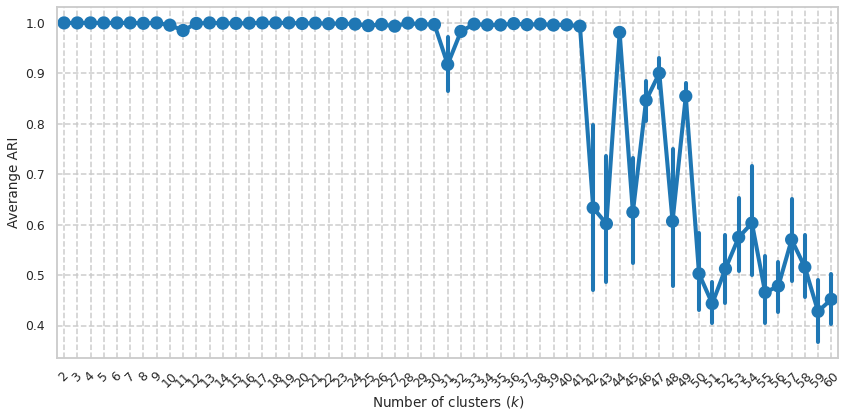

In [50]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(12, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="k", y="ari")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()